## Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Create segment states

In [2]:
h_segments = np.zeros((1, 3, 10), dtype=np.bool)
v_segments = np.zeros((2, 3, 10), dtype=np.bool)

Digit 0

In [3]:
h_segments[:, :, 0] = [1, 0, 1]
v_segments[:, :, 0] = [
    [1, 0, 1],
    [1, 0, 1]
]

Digit 1

In [4]:
h_segments[:, :, 1] = [0, 0, 0]
v_segments[:, :, 1] = [
    [0, 0, 1],
    [0, 0, 1]
]

Digit 2

In [5]:
h_segments[:, :, 2] = [1, 1, 1]
v_segments[:, :, 2] = [
    [0, 0, 1],
    [1, 0, 0]
]

Digit 3

In [6]:
h_segments[:, :, 3] = [1, 1, 1]
v_segments[:, :, 3] = [
    [0, 0, 1],
    [0, 0, 1]
]

Digit 4

In [7]:
h_segments[:, :, 4] = [0, 1, 0]
v_segments[:, :, 4] = [
    [1, 0, 1],
    [0, 0, 1]
]

Digit 5

In [8]:
h_segments[:, :, 5] = [1, 1, 1]
v_segments[:, :, 5] = [
    [1, 0, 0],
    [0, 0, 1]
]

Digit 6

In [9]:
h_segments[:, :, 6] = [1, 1, 1]
v_segments[:, :, 6] = [
    [1, 0, 0],
    [1, 0, 1]
]

Digit 7

In [10]:
h_segments[:, :, 7] = [1, 0, 0]
v_segments[:, :, 7] = [
    [0, 0, 1],
    [0, 0, 1]
]

Digit 8

In [11]:
h_segments[:, :, 8] = [1, 1, 1]
v_segments[:, :, 8] = [
    [1, 0, 1],
    [1, 0, 1]
]

Digit 9

In [12]:
h_segments[:, :, 9] = [1, 1, 0]
v_segments[:, :, 9] = [
    [1, 0, 1],
    [0, 0, 1]
]

In [13]:
np.save('../data/h_segments.npy', h_segments)
np.save('../data/v_segments.npy', v_segments)

## Pixel states

In [14]:
pixels = np.zeros((5, 3, 10), dtype=np.bool)

In [15]:
for digit in range(0, 10):
    for hsi in h_segments[:, :, digit].flatten().nonzero():
        row = hsi * 2
        pixels[row, :, digit] = 1
    
    for vsi in v_segments[0, :, digit].nonzero():
        col = vsi
        pixels[0:3, col, digit] = 1
    
    for vsi in v_segments[1, :, digit].nonzero():
        col = vsi
        pixels[2:, col, digit] = 1

In [16]:
np.save('../data/pixels.npy', pixels)

## Visualizing pixel states

In [17]:
pixels[:, :, 0]

array([[ True,  True,  True],
       [ True, False,  True],
       [ True, False,  True],
       [ True, False,  True],
       [ True,  True,  True]])

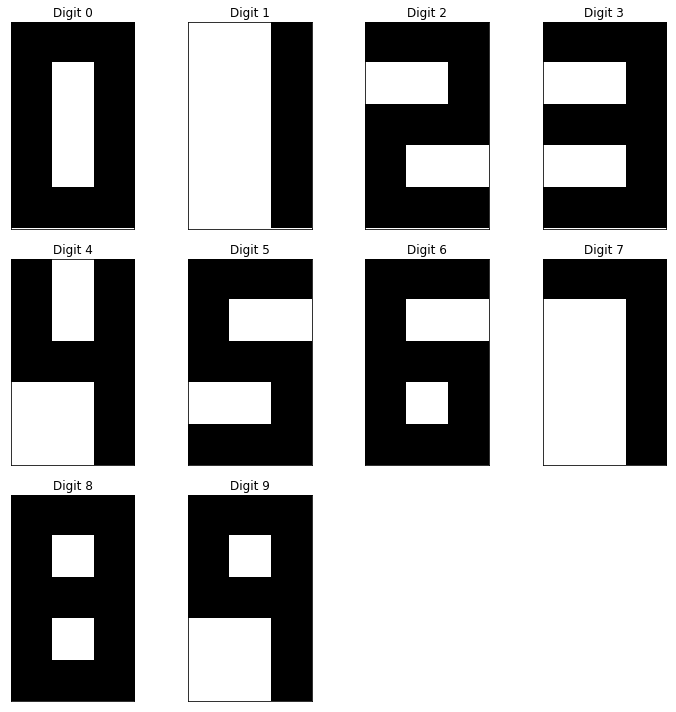

In [18]:
fig, ax = plt.subplots(3, 4, figsize=(10, 10))

for digit in range(0, 10):
    plt.sca(ax[digit // 4, digit % 4])
    plt.imshow(1 - pixels[:, :, digit], cmap='gray', vmin=0, vmax=1)
    plt.title('Digit {}'.format(digit))
    plt.xticks([])
    plt.yticks([])

ax[2,2].set_visible(False)
ax[2,3].set_visible(False)

plt.tight_layout()